<h1><center>Charting AI/ML Growth Across the World</center></h1>
<h4><center>
<a style="text-decoration:none" href="https://author1.github.io/">Mahika Jaguste</a>, IIT Gandhinagar, <a style="text-decoration:none" href="mailto:<mahika.oj>@iitgn.ac.in">mahika.oj@iitgn.ac.in</a>
<br><br>
<a style="text-decoration:none" href="https://nipun0307.github.io/">Nipun Mahajan</a>, IIT Gandhinagar, <a style="text-decoration:none" href="mailto:<mahajan.n>@iitgn.ac.in">mahajan.n@iitgn.ac.in</a>
<br><br>
<a style="text-decoration:none" href="https://author2.github.io/">Shrreya Singh</a>, IIT Gandhinagar, <a style="text-decoration:none" href="mailto:<singh.shrreya>@iitgn.ac.in">singh.shrreya@iitgn.ac.in</a>
</center></h4>

[![Repo](https://img.shields.io/badge/GitHub-<mahika_shrreya_nipun>-brightgreen)](https://github.com/orgs/CS328-Spring-2022/teams/mahika_nipun_shrreya)

In [1]:
import os
import random
import re
import string
from collections import Counter

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from matplotlib import rc
rc('animation', html='jshtml')

import seaborn as sns

import re, os, string
from sklearn.feature_extraction.text import TfidfVectorizer

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import Word2Vec

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download("stopwords")

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

import networkx as nx
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
SEED = 42
random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
np.random.seed(SEED)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MAHIKA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MAHIKA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
papers_df = pd.read_csv('data/new_papers.csv')
papers_df.head()

Conference  Year                                              Title  \
0    NeurIPS  2006  Attentional Processing on a Spike-Based VLSI N...   
1    NeurIPS  2006  Attentional Processing on a Spike-Based VLSI N...   
2    NeurIPS  2006  Attentional Processing on a Spike-Based VLSI N...   
3    NeurIPS  2006                        Multi-Task Feature Learning   
4    NeurIPS  2006                        Multi-Task Feature Learning   

             Author                                        Affiliation  
0      Yingxue Wang      Swiss Federal Institute of Technology, Zurich  
1  Rodney J Douglas                      Institute of Neuroinformatics  
2     Shih-Chii Liu  Institute for Neuroinformatics, University of ...  
3  Andreas Argyriou                            Ecole Centrale de Paris  
4    Theos Evgeniou                                             INSEAD

<hr>

### Visualising The Data Points

In [3]:
# Visualising the data

fig = px.scatter_3d(papers_df.sample(n=100), x='Year', y='Conference', z='Author',
              color='Affiliation', template="plotly_dark")
# fig.update_layout(margin={"r":0,"t":10,"l":00,"b":100})
fig.show()

A sample of 100 points is taken from the dataset for the visualisation. Each row in our dataset represents a unique paper published in a particular year. The attributes in the dataset used are: `[Conference, Year, Title, Author, Affiliation]`. To visualise the data in a 3D perspective, each paper is identified by the attributes: `[Conference, Year, Author]`. For a research paper having the same attributes, color is used to distinguish between such instances. Therefore, each point $(p_{id})$ in space indicating a published paper, is presented as:
$$p_{id}= f(conference, year, author)$$


In [4]:
# get the list of the top 10 universities till now
dict_ = {}
for insti in papers_df['Affiliation']:
    insti = str(insti)
    if insti == 'None':
        continue
    if insti not in dict_.keys():
        dict_[insti] = (papers_df.Affiliation == insti).sum()

sorted_by_value=(sorted(dict_.items(), key=lambda item: item[1], reverse=True))
top_10_institutes = []
for tuple in sorted_by_value[:10]:
    top_10_institutes.append(tuple[0])

In [5]:
# get a dictionary which outputs the list of number of papers published by top 10 universities in a year x:
y_paper_count_top_10 = {}

for year in range(2006,2022, 1):
    y_paper_count_top_10[year] = []
    temp_df = papers_df[papers_df.Year == year]
    for insti in top_10_institutes:
        count = (temp_df.Affiliation==insti).sum()
        y_paper_count_top_10[year].append(count)


In [6]:
# Now we need to plot the growth on a bar chart for the institutes
# we will have 8 points : 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2021

import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Add traces, one for each slider step
for step in np.arange(2006, 2021, 1):
    fig.add_trace(
        go.Bar(
            visible=False,
            # line=dict(color="#00CED1", width=6),
            # name="𝜈 = " + str(step),
            x = top_10_institutes,
            y = y_paper_count_top_10[step],
            name = "Year="+str(step),
            
            # color = 'rgb(255,0,0)',
           ))

# Make 10th trace visible
fig.data[0].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Slider switched to Year: " + str(2006+i)}],  # layout attribute
        label = str(2006+i*1),
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Trend For Year: ", },
    pad={"t": 80},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()

The above interactive slider displays the contribution of top 10 organisations in terms of number of research papers published (centered around machine-based learning) in a certain year. 

The notion of 'top organisations' in our analysis is subject to the cummulative number of papers published over the years. For our dataset available till only the year 2021, we have retrieved the top 10 organisations based on the number of papers published in the duration: 2006-2021. However, due to methodological constraints, the data corresponding to the year 2021 is not complete. 

We analyse the number of research papers published to abstract the contribution of certain organisations in the mentioned field. Charting such a trend helps to analyse the behaviour of the current top 10 institutes over the years. For example, **DeepMind**, a current top institute in the research field of Deep Learning had no publications in thye year `2006`. However, as the demand and attention towards Deep Learning increased after 2014, the number of publications sore to `301` in the year `2019`. This paradigm shift was a response to the growing demand for faster algorithms for deep learning and related techniques after the year 2014. 

Interestingly, the year `2020` witnessed the highest number of cumumulative research papers across the top 10 affiliated institutes. The trend explains the boost in current demand of the technology as every manufacturing sector depends on machine-based learning to increase responsiveness. 

The growth this 'growth' trend spoken-of numerous times is evident as the average number of publications increases tremedously from `25` in the year `2014` to about `290` in the year `2020`.

<hr>

In [7]:
papers = pd.read_csv('data/new_papers.csv')
papers = papers.drop_duplicates()

ath = []
val = []
for name, pub in papers.Author.value_counts().head(10).iteritems():
    ath.append(name)
    val.append(pub)

df = pd.DataFrame(list(zip(ath, val)),columns =['Authors', 'Papers'])

fig = px.bar(df, x="Authors", y="Papers", color='Authors')
fig.update_layout(title_text = "Authors publishing maximum number of papers",title_x=0.5)
fig.show()

```
Dataset: 

The dataset contains all paper titles, authors and their affiliations from the years

ICML Conference: 2017-2020
NeurIPS Conference: 2006-2020
ICLR Conference: 2018-2021 (except 2020)
```

This is a distribution of the top 10 authors who published maximum number of papers since 2006 (upto 2021). Sergey Levine, Pieter Abbeel and Michael Jordan are associated with UC Berkely, Yoshua with University of Montreal and Lawrence Carin with Duke University. According to current treds, America is leading research in AI and ML in terms of number of papers are published. From the above distribution, it can be observed that six out of ten authors are associated with a USA institute which justifies the current trends. 

In [8]:
author_counts = papers.value_counts('Author').rename_axis('author_name').reset_index(name='paper_count')

fig = px.histogram(author_counts, x="paper_count", nbins = 60, color='paper_count')
fig.update_layout(title_text = "Plot of total papers published by authors vs frequency",title_x=0.5)
fig.show()

```
Dataset: 

The dataset contains all paper titles, authors and their affiliations from the years

ICML Conference: 2017-2020
NeurIPS Conference: 2006-2020
ICLR Conference: 2018-2021 (except 2020)
```

This is a plot of total number of papers published vs how many authors published those many papers. Each colour represents differet number of papers. All the authors' performance can be considered independent over here. As observed, this doesn't follow the Central Limit Theorem and as the paper count increases, frequency of authors decreases drastically.

In [9]:
PUNCTUATION = """!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~""" 
TOP_K_KEYWORDS = 10 # top k number of keywords to retrieve in a ranked document
STOPWORD_PATH = 'data/stopwords_ls.txt'
PAPERS_PATH = 'data/papers.csv'

Note: To run the below cells, unzip papers.csv.gz present in the data folder and rename it as papers.csv

In [14]:
def get_sw_lst(path):
    
    with open(path,'r') as f:

        listl=[]
        for line in f:
            strip_lines=line.strip()
            listli=strip_lines.split()
            listl += listli
            
        return listl

In [15]:
def clean_text(text):
    """Doc cleaning"""
    
    # Lowering text
    text = text.lower()
    
    # Removing punctuation
    text = "".join([c for c in text if c not in PUNCTUATION])
    
    # Removing whitespace and newlines
    text = re.sub('\s+',' ',text)
    
    return text

In [16]:
def sort_coo(coo_matrix):
    """Sort a dict with highest score"""
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature, score
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

def get_keywords(vectorizer, feature_names, doc):
    """Return top k keywords from a doc using TF-IDF method"""

    #generate tf-idf for the given document
    tf_idf_vector = vectorizer.transform([doc])
    
    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    #extract only TOP_K_KEYWORDS
    keywords=extract_topn_from_vector(feature_names,sorted_items,TOP_K_KEYWORDS)
    
    return list(keywords.keys())

In [17]:
data = pd.read_csv(PAPERS_PATH)
data.head()

source_id  year                                              title  \
0         27  1987                         Bit-Serial Neural Networks   
1         63  1987                        Connectivity Versus Entropy   
2         60  1987        The Hopfield Model with Multi-Level Neurons   
3         59  1987                               How Neural Nets Work   
4         69  1987  Spatial Organization of Neural Networks: A Pro...   

  abstract                                          full_text  
0      NaN  573 \n\nBIT - SERIAL NEURAL  NETWORKS \n\nAlan...  
1      NaN  1 \n\nCONNECTIVITY VERSUS ENTROPY \n\nYaser  S...  
2      NaN  278 \n\nTHE HOPFIELD MODEL WITH MUL TI-LEVEL N...  
3      NaN  442 \n\nAlan  Lapedes \nRobert  Farber \n\nThe...  
4      NaN  740 \n\nSPATIAL  ORGANIZATION  OF  NEURAL  NEn...

In [18]:
data.dropna(subset=['full_text'], inplace=True)
data['full_text'] = data['full_text'].apply(clean_text)

data.head()

source_id  year                                              title  \
0         27  1987                         Bit-Serial Neural Networks   
1         63  1987                        Connectivity Versus Entropy   
2         60  1987        The Hopfield Model with Multi-Level Neurons   
3         59  1987                               How Neural Nets Work   
4         69  1987  Spatial Organization of Neural Networks: A Pro...   

  abstract                                          full_text  
0      NaN  573 bit serial neural networks alan f murray a...  
1      NaN  1 connectivity versus entropy yaser s abumosta...  
2      NaN  278 the hopfield model with mul tilevel neuron...  
3      NaN  442 alan lapedes robert farber theoretical div...  
4      NaN  740 spatial organization of neural nenorks a p...

In [20]:
test = data.groupby('year').sample(n= 25, random_state=25)
train = data.drop(test.index, axis = 0)

corpora = train['full_text'].to_list()

# get the stop words list
stopwords=get_sw_lst(STOPWORD_PATH)

# Initializing TF-IDF Vectorizer with the given stopword list
vectorizer = TfidfVectorizer(stop_words=stopwords, smooth_idf=True, use_idf=True)

# Creating vocabulary with our corpora
vectorizer.fit_transform(corpora)

# Storing the created vocabulary
feature_names = vectorizer.get_feature_names()

D:\Software\Anaconda\envs\cs328_writing_new\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'll', 'mon', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.

D:\Software\Anaconda\envs\cs328_writing_new\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [21]:
result = []
i = 0
test_lst = test['full_text'].to_list()
yrs = test.year.to_list()

word_data = {}

# Associating the top 10 keywords from each paper and their years
for doc in test_lst:
    df = {}
    df['full_text'] = doc
    df['year'] = yrs[i]
    wordsl = get_keywords(vectorizer, feature_names, doc)
    df['top_keywords'] = wordsl
    result.append(df)

    if(yrs[i] in word_data):
        word_data[yrs[i]] += wordsl
    else:
        word_data[yrs[i]] = wordsl

    i = i+1
    
final = pd.DataFrame(result)

In [22]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [23]:
 
for key,val in word_data.items():
    words_string=(" ").join(val)
    wordcloud = WordCloud(width = 1000, height = 500).generate(words_string)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("assets/wc_{}.png".format(key), bbox_inches='tight')
    # plt.show()
    plt.close()

In [24]:
from ipywidgets import widgets, interactive
import matplotlib.image as mpimg

# Make a dropdown to select the year
year = widgets.Dropdown(
    options= list(word_data.keys()),
    value= 2019,
    description='Year',
)

def plotit(year):

    if(year<1987 or year>2019):
        print('Select a year between 1987 and 2019')
    else:
        img = mpimg.imread('assets/wc_{}.png'.format(year))
        imgplot = plt.imshow(img)
        plt.show()


interactive(plotit, year=year)

interactive(children=(Dropdown(description='Year', index=32, options=(1987, 1988, 1989, 1990, 1991, 1992, 1993…

```
Dataset: 

This dataset contains the year of publication, title, author details, abstracts, and full text from the years

NeurIPS Conference: 1987-2019.
```

Over 33 years, the research domains in AI has changed significantly. This can be studied by analysisng the top keywords in papers published over the years. The observation in this report is carried out on top 10 such keywords of randomly and uniformly selected 825 papers published in NeurIPS conference from 1987-2019. The keywords were extracted using built-in algorithm of TD-IDF in Scikit-learn library. The stopwords were ignored and only relevant keywords were considered during training. The vocabulary was created by learning on 8852 papers. From these word clouds, we propose to study the growth of AI and tools over the year.

Initially, neurons were one of the only widely researched areas in the AI world. Most of the papers focussed on training their `neural` networks or worked on efficiently developing their `neurons`.
Since 1995, rapid development was witnessed in Learning Classifier System algorithms and its applications. Over the next years, papers focussed on these topics as can be seen from the top trending words like `classifier`, `cell`, `learning`.

In the 21st century, graph, tree and deep neural networks also gained popularity in identifying features and extracting relationships between nodes. As a result, words like `graph` `matrix` `tree` `deep` were popularly used in papers. Words like `regularization` were also observed in between. Some words like `cluster` `learning` `kernel` remain popular throughout these years as clustering data and learning on it are still some of the basic data analysis tasks. 

Some noises can be induced in the above observations but it gives a good idea about the flow of research areas over the years.

<hr>

### Analyzing research paper titles

In [25]:
df = pd.read_csv('./data/new_papers.csv')
df = df.drop_duplicates()
print(df.shape)
df.head()

(49296, 5)


Conference  Year                                              Title  \
0    NeurIPS  2006  Attentional Processing on a Spike-Based VLSI N...   
1    NeurIPS  2006  Attentional Processing on a Spike-Based VLSI N...   
2    NeurIPS  2006  Attentional Processing on a Spike-Based VLSI N...   
3    NeurIPS  2006                        Multi-Task Feature Learning   
4    NeurIPS  2006                        Multi-Task Feature Learning   

             Author                                        Affiliation  
0      Yingxue Wang      Swiss Federal Institute of Technology, Zurich  
1  Rodney J Douglas                      Institute of Neuroinformatics  
2     Shih-Chii Liu  Institute for Neuroinformatics, University of ...  
3  Andreas Argyriou                            Ecole Centrale de Paris  
4    Theos Evgeniou                                             INSEAD

In [26]:
data = df['Title'].explode().unique()
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(data)]
tagged_data[0]

TaggedDocument(words=['attentional', 'processing', 'on', 'a', 'spike-based', 'vlsi', 'neural', 'network'], tags=['0'])

In [ ]:
max_epochs = 100
vec_size = 20
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm = 0)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

In [8]:
# model.save("./assets/d2v.model")
# print("Model Saved")
# temp = model

In [28]:
model= Doc2Vec.load("./assets/d2v.model")
title_embeddings = []
for i in range(len(model.dv)):
  temp = model.dv[i]
  title_embeddings.append(temp)
title_embeddings = np.array(title_embeddings)

In [29]:
def create_node_trace(G):
    # collect node information from G to plot
    node_x = []
    node_y = []
    node_text = []
    node_color = []

    for i, node in enumerate(G.nodes(data=True)):
        # get node x,y position and store
        x, y = node[1]['pos']
        node_x.append(x)
        node_y.append(y)

        node_text.append(node[1]['text'])
        node_color.append(node[1]['color'])

    # create node trace (i.e., scatter plot)
    # make it invisible by default
    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=False,
            color=node_color,
            size=16,
            line_width=0.5,
        ),
        text=node_text,
        visible=False
    )

    return node_trace

In [30]:
def create_edge_trace(G):
    # collect edges information from G to plot
    edge_weight = []
    edge_text = []
    edge_pos = []
    edge_color = []
    
    for edge in G.edges(data=True):
        
        # edge is line connecting two points
        x0, y0 = G.nodes[edge[0]]['pos']
        x1, y1 = G.nodes[edge[1]]['pos']
        edge_pos.append([[x0, x1, None], [y0, y1, None]])
        
        # edge line color when drawn
        edge_color.append("black")

    # there is a trace for each edge
    edge_traces = []
    for i in range(len(edge_pos)):
        
        # edge line width
        line_width = 1

        # is scatter because it is line connecting two points
        trace = go.Scatter(
            x=edge_pos[i][0], y=edge_pos[i][1],
            line=dict(width=line_width, color=edge_color[i]),
            mode='lines',
            visible=False
        )
        edge_traces.append(trace)

    return edge_traces

In [31]:
def filter_similarity_matrix_at_step(square_matrix, step_value):
    # copy matrix
    aux = square_matrix.copy()
    
    # set as NaN all values equal to or below threshold value
    aux[aux <= step_value] = np.nan
    
    # return filtered matrix
    return aux

In [32]:
def get_interactive_slider_similarity_graph(square_matrix, slider_values, node_text=None, yaxisrange=None, xaxisrange=None):
    
    # Create figure with plotly
    fig = go.Figure()

    # key: slider value
    # value: list of traces to display for that slider value
    slider_dict = {}
    
    # total number of traces
    total_n_traces = 0
    
    # node positions on plot
    #node_pos = None

    # for each possible value in the slider, create and store traces (i.e., plots)
    for i, step_value in enumerate(slider_values):

        # update similarity matrix for the current step
        aux = filter_similarity_matrix_at_step(square_matrix, step_value)

        # create nx graph from sim matrix
        G = nx.to_networkx_graph(aux)
        
        # remove edges for 0 weight (NaN)
        G.remove_edges_from([(a, b) for a, b, attrs in G.edges(data=True) if np.isnan(attrs["weight"])])

        # assign node positions if None
        node_pos = nx.nx_pydot.graphviz_layout(G)

        # populate nodes with meta information
        for node in G.nodes(data=True):
            
            # node position
            node[1]['pos'] = node_pos[node[0]]

            # node color
            node[1]['color'] = "orange"

            # node text on hover if any is specified else is empty
            if node_text is not None:
                node[1]['text'] = node_text[node[0]]
            else:
                node[1]['text'] = ""

        # create edge taces (each edge is a trace, thus this is a list)
        edge_traces = create_edge_trace(G)
        
        # create node trace (a single trace for all nodes, thus it is not a list)
        node_trace = create_node_trace(G) 

        # store edge+node traces as single list for the current step value
        slider_dict[step_value] = edge_traces + [node_trace]
        
        # keep count of the total number of traces
        total_n_traces += len(slider_dict[step_value])

        # make sure that the first slider value is active for visualization
        if i == 0:
            for trace in slider_dict[step_value]:
                # make visible
                trace.visible = True

                
    # Create steps objects (one step per step_value)
    steps = []
    for step_value in slider_values:
        
        # count traces before adding new traces
        n_traces_before_adding_new = len(fig.data)
        
        # add new traces
        fig.add_traces(slider_dict[step_value])

        step = dict(
            # update figure when this step is active
            method="update",
            # make all traces invisible
            args=[{"visible": [False] * total_n_traces}],
            # label on the slider
            label=str(round(step_value, 3)),
        )

        # only toggle this step's traces visible, others remain invisible
        n_traces_for_step_value = len(slider_dict[step_value])
        for i in range(n_traces_before_adding_new, n_traces_before_adding_new + n_traces_for_step_value):
            step["args"][0]["visible"][i] = True
        
        # store step object in list of many steps
        steps.append(step)

    # create slider with list of step objects
    slider = [dict(
        active=0,
        steps=steps
    )]

    # add slider to figure and create layout
    fig.update_layout(
        sliders=slider,
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20, l=5, r=5, t=40),
        xaxis=dict(range=xaxisrange, showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(range=yaxisrange, showgrid=False, zeroline=False, showticklabels=False),
        width=700, height=700,
    )

    return fig

In [33]:
def Rand(start, end, num):
    res = []
 
    for j in range(num):
        res.append(random.randint(start, end))
 
    return res

In [34]:
sample_index = Rand(0, len(title_embeddings), 50)
sample_title_embeddings = [title_embeddings[i] for i in sample_index]
sample_data = [data[i] for i in sample_index]

In [35]:
similarity_matrix = cosine_similarity(sample_title_embeddings)
print(similarity_matrix.shape)

(50, 50)


In [36]:
# define slider steps (i.e., threshold values)
slider_steps = np.arange(0.4, 0.85, 0.05)
    
# get the slider figure
fig = get_interactive_slider_similarity_graph(
    similarity_matrix,
    slider_steps,
    node_text = sample_data
)

fig.update_layout(title_text='Similarity between 50 random samples.', title_x=0.5)
# plot it
fig.show()

One of the basic steps of any data analysis task is the representation of objects in a machine-understandable format. The title of a research paper is the first interaction between the authors and readers. Ideally, the title of the paper captures the precise research field to which the paper contributes. The titles are converted to vectors using the Word2Vec and Doc2Vec algorithms to be able to perform computations on them. The cosine similarity between fifty randomly sampled titles was computed and the vectors with similarity greater than the threshold indicated by the slider have been plotted. At the threshold similarity of 0.6, a cluster of titles on the topics of unsupervised learning and meta-learning is observed. As the similarity threshold goes higher, the number of connections between titles decreases as we have plotted just fifty samples and not all the titles.

In [37]:
def clean_text(text, tokenizer, stopwords):
    """Pre-process text and generate tokens

    Args:
        text: Text to tokenize.

    Returns:
        Tokenized text.
    """
    text = str(text).lower()  # Lowercase words
    text = re.sub(r"\[(.*?)\]", "", text)  # Remove [+XYZ chars] in content
    text = re.sub(r"\s+", " ", text)  # Remove multiple spaces in content
    text = re.sub(r"\w+…|…", "", text)  # Remove ellipsis (and last word)
    text = re.sub(r"(?<=\w)-(?=\w)", " ", text)  # Replace dash between words
    text = re.sub(
        f"[{re.escape(string.punctuation)}]", "", text
    )  # Remove punctuation

    tokens = tokenizer(text)  # Get tokens from text
    tokens = [t for t in tokens if not t in stopwords]  # Remove stopwords
    tokens = ["" if t.isdigit() else t for t in tokens]  # Remove digits
    tokens = [t for t in tokens if len(t) > 1]  # Remove short tokens
    return tokens

In [39]:
from nltk.corpus import stopwords

In [40]:
df_raw = pd.read_csv('./data/new_papers.csv')
df_raw = df_raw.drop_duplicates()

custom_stopwords = set(stopwords.words("english"))
text_columns = ["Title"]

df = df_raw.copy()

for col in text_columns:
    df[col] = df[col].astype(str)

# Create text column based on title, description, and content
df["text"] = df[text_columns].apply(lambda x: " | ".join(x), axis=1)
df["tokens"] = df["text"].map(lambda x: clean_text(x, word_tokenize, custom_stopwords))

# Remove duplicated after preprocessing
_, idx = np.unique(df["tokens"], return_index=True)
df = df.iloc[idx, :]

# Remove empty values and keep relevant columns
df = df.loc[df.tokens.map(lambda x: len(x) > 0), ["text", "tokens", "Year", "Conference"]]

print(f"Original dataframe: {df_raw.shape}")
print(f"Pre-processed dataframe: {df.shape}")

Original dataframe: (49296, 5)
Pre-processed dataframe: (13262, 4)


In [41]:
docs = df["text"].values
tokenized_docs = df["tokens"].values

In [42]:
model = Word2Vec(sentences=tokenized_docs, vector_size=100, workers=1, seed=SEED)

In [43]:
def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features
    
vectorized_docs = vectorize(tokenized_docs, model=model)
len(vectorized_docs), len(vectorized_docs[0])

(13262, 100)

In [44]:
def mbkmeans_clusters(
	X, 
    k, 
    mb, 
    print_silhouette_values, 
):
    """Generate clusters and print Silhouette metrics using MBKmeans

    Args:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.

    Returns:
        Trained clustering model and labels based on X.
    """
    km = MiniBatchKMeans(n_clusters=k, batch_size=mb).fit(X)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, km.labels_):0.2f}")
    print(f"Inertia:{km.inertia_}")

    if print_silhouette_values:
        sample_silhouette_values = silhouette_samples(X, km.labels_)
        print(f"Silhouette values:")
        silhouette_values = []
        for i in range(k):
            cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
            silhouette_values.append(
                (
                    i,
                    cluster_silhouette_values.shape[0],
                    cluster_silhouette_values.mean(),
                    cluster_silhouette_values.min(),
                    cluster_silhouette_values.max(),
                )
            )
        silhouette_values = sorted(
            silhouette_values, key=lambda tup: tup[2], reverse=True
        )
        for s in silhouette_values:
            print(
                f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
            )
    return km, km.labels_

In [45]:
clustering, cluster_labels = mbkmeans_clusters(
	X=vectorized_docs,
    k=20,
    mb=500,
    print_silhouette_values=False,
)

D:\Software\Anaconda\envs\cs328_writing_new\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning:

MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=2



For n_clusters = 20
Silhouette coefficient: 0.19
Inertia:222.4913878259843


In [46]:
for test_cluster in range(20):
    most_representative_docs = np.argsort(np.linalg.norm(vectorized_docs - clustering.cluster_centers_[test_cluster], axis=1))
    print("Cluster", test_cluster, ":",docs[most_representative_docs[0]])

Cluster 0 : Learning Discrete Energy-based Models via Auxiliary-variable Local Exploration
Cluster 1 : On the Transfer of Inductive Bias from Simulation to the Real World: a New Disentanglement Dataset
Cluster 2 : GIANT: Globally Improved Approximate Newton Method for Distributed Optimization
Cluster 3 : The Neuro-Symbolic Concept Learner: Interpreting Scenes, Words, and Sentences From Natural Supervision
Cluster 4 : Improving generalization by controlling label-noise information in neural network weights
Cluster 5 : Efficient Learning by Directed Acyclic Graph For Resource Constrained Prediction
Cluster 6 : Peer Loss Functions: Learning from Noisy Labels without Knowing Noise Rates
Cluster 7 : fMRI-Based Inter-Subject Cortical Alignment Using Functional Connectivity
Cluster 8 : Approximate Newton Methods and Their Local Convergence
Cluster 9 : How hard is to distinguish graphs with graph neural networks?
Cluster 10 : Variational Information Maximization for Feature Selection
Cluster 1

In [47]:
df_clusters = pd.DataFrame({
    "text": docs,
    "tokens": [" ".join(text) for text in tokenized_docs],
    "cluster": cluster_labels,
    "vectorized_docs": vectorized_docs,
    "year": list(df['Year']),
    "conference": list(df['Conference'])
})

In [48]:
df_clusters.head()

text  \
0        On 1/n neural representation and robustness   
1  Do 2D GANs Know 3D Shape? Unsupervised 3D Shap...   
2   3D-Aware Scene Manipulation via Inverse Graphics   
3     3D Gaze Concurrences from Head-mounted Cameras   
4  3D Multi-bodies: Fitting Sets of Plausible 3D ...   

                                              tokens  cluster  \
0                1n neural representation robustness        9   
1  2d gans know 3d shape unsupervised 3d shape re...       15   
2   3d aware scene manipulation via inverse graphics       15   
3          3d gaze concurrences head mounted cameras        1   
4  3d multi bodies fitting sets plausible 3d huma...        0   

                                     vectorized_docs  year conference  
0  [0.056133837, -0.010953411, -0.18008822, 0.063...  2020    NeurIPS  
1  [0.04935929, -0.04940794, -0.12340832, 0.04383...  2021       ICLR  
2  [0.048220705, -0.045804773, -0.12345145, 0.046...  2018    NeurIPS  
3  [0.037655167, -0.04429528, -0.09770333, 0.0377...  2012    NeurIPS  
4  [0.061576527, -0.06371212, -0.14973295, 0.0626...  2020    NeurIPS

In [49]:
def Extract(lst, i):
    return [item[i] for item in lst]

In [50]:
pca = PCA(2)
#Transform the data
pca_vectorized_docs = pca.fit_transform(vectorized_docs)
df_clusters['pca_vectorized_docs'] = list(pca_vectorized_docs)
df_clusters['axis0'] = Extract(df_clusters['pca_vectorized_docs'], 0)
df_clusters['axis1'] = Extract(df_clusters['pca_vectorized_docs'], 1)

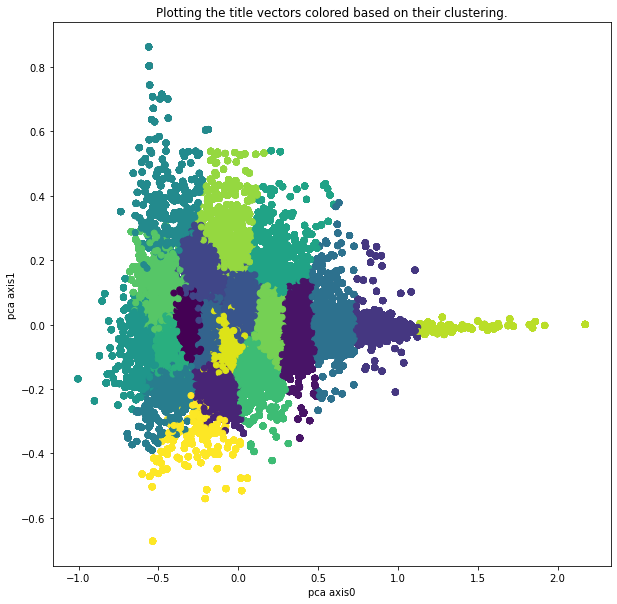

In [51]:
# Getting unique labels
u_labels = np.unique(df_clusters['cluster'])

# plotting the results:

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

for i in u_labels:
    plt.scatter(Extract(df_clusters['pca_vectorized_docs'], 0), Extract(df_clusters['pca_vectorized_docs'],1) , c = df_clusters['cluster'])
plt.title('Plotting the title vectors colored based on their clustering.')
plt.xlabel('pca axis0')
plt.ylabel('pca axis1')
plt.show()

After observing the similarity between the titles, the Mini-Batch K-Means Clustering algorithm is performed to cluster the titles based on their vector representations and cosine similarities. Although the fields of ML and AI are growing richer by the day, with researchers delving into more niche problems, the number of clusters was restricted to be twenty. This was done for the ease of understanding the visualisations. After clustering, the most popular terms present in each cluster were extracted so as to gain an understanding about the label of the cluster. The popular terms such as in cluster 7 are `graph network recurrent training convolutional` which indicates that the papers clubbed together in this cluster are based on training models on convolutional and recurrent networks. Cluster 12 is captured by the terms `faster parallel greedy fast regularized`, implying that the papers in this cluster focus on optimising the solutions by using parallel computing and algorithms with faster time complexity.

In [52]:
cluster_terms_dict = {}
for i in range(20):
    tokens_per_cluster = ""
    most_representative = model.wv.most_similar(positive=[clustering.cluster_centers_[i]], topn=5)
    for t in most_representative:
        tokens_per_cluster += f"{t[0]} "
    print(f"Cluster {i}: {tokens_per_cluster}")
    cluster_terms_dict[i] = tokens_per_cluster

df_clusters['cluster_terms'] = [0]*df_clusters.shape[0]
for index, row in df_clusters.iterrows():
    df_clusters['cluster_terms'][index] = cluster_terms_dict[row['cluster']]

Cluster 0: human scalable joint embedding partial 
Cluster 1: application partial human single estimating 
Cluster 2: algorithm method adaptive proximal problems 
Cluster 3: human single partial dynamics application 
Cluster 4: attention equivariant nets understanding using 
Cluster 5: view uncertainty knowledge embedding human 
Cluster 6: partial application human multiple approach 
Cluster 7: human weight dynamics scalable joint 
Cluster 8: algorithm method adaptive proximal problems 
Cluster 9: graph network recurrent training convolutional 
Cluster 10: estimating scalable application weighted manifold 
Cluster 11: network training graph attention equivariant 
Cluster 12: estimating application scalable nonlinear manifold 
Cluster 13: greedy faster problems parallel fast 
Cluster 14: aware representations attention semantic hierarchical 
Cluster 15: human joint partial scalable embedding 
Cluster 16: network graph training recurrent generative 
Cluster 17: single application human e

C:\Users\MAHIKA\AppData\Local\Temp\ipykernel_23008\3475213038.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_clusters['cluster_count'] = [0]*df_clusters.shape[0]

for curr_year in range(2006, 2022):
    temp_df = df_clusters[df_clusters['year'] == curr_year]

    values = temp_df['cluster'].value_counts(dropna=False).keys().tolist()
    counts = [str(x) for x in temp_df['cluster'].value_counts(dropna=False).tolist()]
    cluster_count_dict  = dict(zip(values, counts))
    cluster_count_dict  = dict(sorted(cluster_count_dict.items()))

    for index, row in df_clusters.iterrows():
        if(df_clusters['year'][index] == curr_year):
            df_clusters['cluster_count'][index] = cluster_count_dict[row['cluster']]

df_clusters['cluster_count'] = pd.to_numeric(df_clusters['cluster_count'])

In [54]:
df_clusters = df_clusters.sort_values(by=['year'])
df_clusters.head()

text  \
389   Aggregating Classification Accuracy through Ti...   
8877       Optimal Change-Detection and Spiking Neurons   
5697    Inferring Network Structure from Co-Occurrences   
5692  Inferring Graphical Model Structure using $\el...   
3806  Estimating Observation Functions in Dynamical ...   

                                                 tokens  cluster  \
389   aggregating classification accuracy time class...        5   
8877           optimal change detection spiking neurons       18   
5697         inferring network structure co occurrences        5   
5692  inferring graphical model structure using ell1...       18   
3806  estimating observation functions dynamical sys...        0   

                                        vectorized_docs  year conference  \
389   [0.058725074, -0.04929309, -0.12912354, 0.0408...  2006    NeurIPS   
8877  [0.066823184, -0.069058634, -0.14313138, 0.054...  2006    NeurIPS   
5697  [0.050812878, -0.047920655, -0.13105801, 0.053...  2006    NeurIPS   
5692  [0.063584164, -0.0632438, -0.14147124, 0.06657...  2006    NeurIPS   
3806  [0.06423644, -0.077366844, -0.16328114, 0.0598...  2006    NeurIPS   

                                 pca_vectorized_docs     axis0     axis1  \
389      [0.09754184257446354, 0.007898098976525767]  0.097542  0.007898   
8877  [-0.044197059747401554, -0.028184108712231294] -0.044197 -0.028184   
5697     [0.005186655407960747, 0.10513137481423351]  0.005187  0.105131   
5692    [-0.0767335293721321, 0.0011938508916948202] -0.076734  0.001194   
3806    [-0.3471104983310205, -0.030424964131333845] -0.347110 -0.030425   

                                          cluster_terms  cluster_count  
389         view uncertainty knowledge embedding human              18  
8877  estimating scalable distributions application ...             30  
5697        view uncertainty knowledge embedding human              18  
5692  estimating scalable distributions application ...             30  
3806            human scalable joint embedding partial              24

In [55]:
pio.renderers.default = 'notebook_connected'

fig = px.scatter(df_clusters, x="axis0", y="axis1", animation_frame="year", animation_group="cluster_terms",
            color="cluster_terms", hover_name="text", size='cluster_count', size_max=55)

# fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()

Having analyzed the semantics of the clusters formed, they are now visualized to better understand the trends over the years. Since the title vectors are 100-dimensional which cannot be easily visualized, we perform Principal Component Analysis to capture the huge number of dimensions onto two axes. The title vectors in 2-dimensions, coloured according to the cluster labels, have been plotted. To better understand this plot, the points have been plotted year-wise in the following animation. The colour of the bubbles indicates the cluster to which the paper belongs and its size is controlled by the number of papers falling in that cluster in that year. As the slider progresses over the years, we can see a clear increase in the number of papers published in general (except in the year 2021 as the database was created midway through the year on 20th June). The cluster consisting papers on `attention understanding aware uncertainty nets ` (light blue) increases in size in the year 2017. This observation aligns with the fact that the ground-breaking 'Attention Is All You Need' paper was published in the same year. In the clusters representing `faster parallel greedy fast regularized` (dark green) and `scalable estimating application partial distributions` (light green), we see a sudden rise in the size of the bubble in the year 2018. This is reasonable as during this phase in AI, many algorithms and models had been proposed and focus shifted on making them optimizied and faster. With the increase in cloud technologies, applications involving parallel and distributed computations were proposed. The clusters of papers on `human scalable joint partial embedding` (dark orange) and `graph network recurrent training convolutional` have been around since 2006 and show a gradual increase in the number of publications over the years. This seems reasonable since convolutional and recurrent networks have been proposed in the early 2000's and have been popular as baseline models since then. The terms 'human' and 'scalable' are also at the heart of this field since humans try to emulate the neurons in our brains into computation models and hope to run them on large-scale data to infer meaningful results. The overall trends described above and increasing bubble sizes are a strong indication of the rapid growth in various niche areas of AI. 